In [60]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 

%matplotlib inline
sns.set()

In [29]:
df_train = pd.read_csv(r'D:\aut_ml\ML-HW02\titanic\train.csv')
df_test = pd.read_csv(r'D:\aut_ml\ML-HW02\titanic\test.csv')

In [30]:
print(df_train.shape)

(891, 12)


In [31]:
print(df_test.shape)

(418, 11)


In [32]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [33]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


In [34]:
survived_train = df_train.Survived
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [36]:
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [37]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [38]:
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  1309 non-null   uint8  
 1   Fare      1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Pclass    1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


In [106]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

In [40]:
X = data_train.values
test = data_test.values
y = survived_train.values

In [105]:
DT = tree.DecisionTreeClassifier()
DT.fit(X, y)

DecisionTreeClassifier()

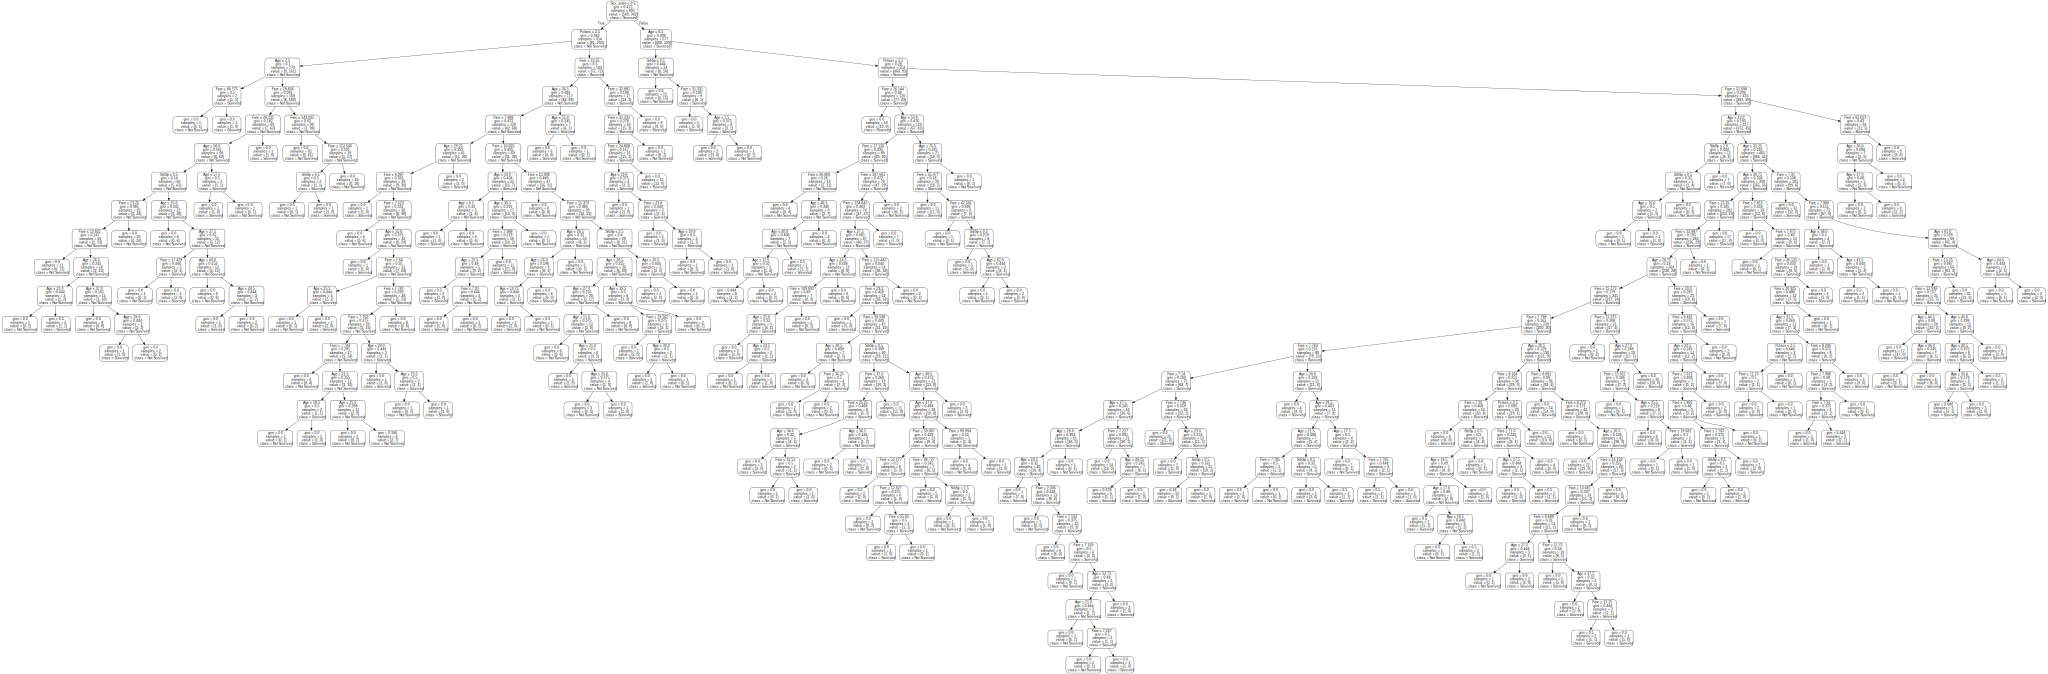

In [107]:
dot_data = tree.export_graphviz(DT, out_file=None, 
                         feature_names=data_train.columns.values,  
                         class_names=['Survived','Not Survived'],  
                         special_characters=True,
                               rounded=True)  
graph = graphviz.Source(dot_data)
graph